# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [14]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities_weather.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [28]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)


651

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [30]:
# set url and unit measurement

url = "http://api.openweathermap.org/data/2.5/weather?"
city = "kodiak"
units = "imperial"

# Build query URL
queryURL = f"{url}appid={weather_api_key}&units={units}&q={city}"

# Get weather data
weatherResponse = requests.get(queryURL)
weatherJSON = weatherResponse.json()


In [18]:
# set empty lists to grab The required pieces of data
# identify the path to each data inside the retreived json

City =[]
Latitude = [] # weatherJSON['coord']['lat']
longtitude = [] # weatherJSON['coord']['lon']
Max_Temperature = [] # weatherJSON['main']['temp_max']
Humidity = [] # # weatherJSON['main']['humidity']
Cloudiness = [] # weatherJSON['clouds']['all']
wind_Speed = [] # weatherJSON['wind']['speed']
Country = []      # weatherJSON['sys']['country']
DateTime = [] # weatherJSON['dt']

# create counter variable to be able to group cities in groups of 50 as requested

rec_count =1
set_count =1


# loop through the cities and grab the information needed for the lists
for h, city in enumerate(cities):
    
    # group cities in group of 50s
    
    if( h % 50 == 0 and h>= 50):
       
    # rest the group every 50 counts of city
        set_count +=1
        rec_count =1
    
    # create end point url
    queryURL = f"{url}appid={weather_api_key}&units={units}&q={city}"
    
    # print the log record as data is being retrieved
    print(f" processing record {rec_count} of set {set_count} | {city}")
    rec_count +=1
    
    try:
        
        
        
        
      
           # Access and retrieve the weather data
        weatherResponse = requests.get(queryURL)
        weatherJSON = weatherResponse.json()
    
 
       # Add a one second interval between queries to stay within API query limits
        time.sleep(1)
    
    # add the info to the lists
    # add exception rule incase data was not found
        
        
        
        City.append(city)   
        Latitude.append(weatherJSON['coord']['lat'])
        longtitude.append(weatherJSON['coord']['lon'])
        Max_Temperature.append(weatherJSON['main']['temp_max'])
        Humidity.append(weatherJSON['main']['humidity'])
        Cloudiness.append(weatherJSON['clouds']['all'])
        wind_Speed.append(weatherJSON['wind']['speed'])
        Country.append(weatherJSON['sys']['country'])
        DateTime.append(weatherJSON['dt'])
        City.append(city)
      
          
    
        
        
    
    except :
        print("Missing field/result... skipping.")
        pass 
        

#  show the data retrival is complete
len(City)
#print("--------------------------------------\n \t Data Retrival is Complete \n --------------------------------------")

 processing record 1 of set 1 | karaul
Missing field/result... skipping.
 processing record 2 of set 1 | cagayan de tawi-tawi
Missing field/result... skipping.
 processing record 3 of set 1 | clyde river
 processing record 4 of set 1 | kapaa
 processing record 5 of set 1 | gavle
 processing record 6 of set 1 | mataura
 processing record 7 of set 1 | cayenne
 processing record 8 of set 1 | hermanus
 processing record 9 of set 1 | butaritari
 processing record 10 of set 1 | oranjestad
 processing record 11 of set 1 | viransehir
 processing record 12 of set 1 | ponta do sol
 processing record 13 of set 1 | seoul
 processing record 14 of set 1 | isangel
 processing record 15 of set 1 | rikitea
 processing record 16 of set 1 | busselton
 processing record 17 of set 1 | juneau
 processing record 18 of set 1 | vaini
 processing record 19 of set 1 | illoqqortoormiut
Missing field/result... skipping.
 processing record 20 of set 1 | suntar
 processing record 21 of set 1 | bowen
 processing reco

 processing record 33 of set 4 | port lincoln
 processing record 34 of set 4 | hede
 processing record 35 of set 4 | oron
 processing record 36 of set 4 | barentsburg
Missing field/result... skipping.
 processing record 37 of set 4 | bagotville
 processing record 38 of set 4 | burdur
 processing record 39 of set 4 | sento se
Missing field/result... skipping.
 processing record 40 of set 4 | fairbanks
 processing record 41 of set 4 | at-bashi
 processing record 42 of set 4 | jizan
 processing record 43 of set 4 | santa lucia
 processing record 44 of set 4 | strezhevoy
 processing record 45 of set 4 | sao joao do piaui
 processing record 46 of set 4 | dudinka
 processing record 47 of set 4 | meadow lake
 processing record 48 of set 4 | brookhaven
 processing record 49 of set 4 | reitz
 processing record 50 of set 4 | mocuba
 processing record 1 of set 5 | sur
 processing record 2 of set 5 | tsihombe
Missing field/result... skipping.
 processing record 3 of set 5 | avarua
 processing reco

 processing record 16 of set 8 | pochutla
 processing record 17 of set 8 | guerrero negro
 processing record 18 of set 8 | petropavlovsk-kamchatskiy
 processing record 19 of set 8 | aklavik
 processing record 20 of set 8 | jawhar
 processing record 21 of set 8 | wilmington island
 processing record 22 of set 8 | palmer
 processing record 23 of set 8 | adrar
 processing record 24 of set 8 | olafsvik
 processing record 25 of set 8 | aboisso
 processing record 26 of set 8 | nantucket
 processing record 27 of set 8 | kiruna
 processing record 28 of set 8 | easton
 processing record 29 of set 8 | ordzhonikidze
 processing record 30 of set 8 | macaboboni
Missing field/result... skipping.
 processing record 31 of set 8 | fonte boa
 processing record 32 of set 8 | marsh harbour
 processing record 33 of set 8 | axim
 processing record 34 of set 8 | jiayuguan
 processing record 35 of set 8 | merrill
 processing record 36 of set 8 | kinablangan
 processing record 37 of set 8 | airai
 processing r

 processing record 46 of set 11 | angoche
 processing record 47 of set 11 | ketchikan
 processing record 48 of set 11 | alyangula
 processing record 49 of set 11 | oussouye
 processing record 50 of set 11 | lorengau
 processing record 1 of set 12 | ranot
 processing record 2 of set 12 | jatiroto
 processing record 3 of set 12 | bordighera
 processing record 4 of set 12 | otukpo
 processing record 5 of set 12 | santiago de cao
 processing record 6 of set 12 | margate
 processing record 7 of set 12 | port blair
 processing record 8 of set 12 | fantan
 processing record 9 of set 12 | sangar
 processing record 10 of set 12 | sangmelima
 processing record 11 of set 12 | tigzirt
 processing record 12 of set 12 | porkhov
 processing record 13 of set 12 | teya
 processing record 14 of set 12 | bin qirdan
 processing record 15 of set 12 | armizonskoye
 processing record 16 of set 12 | abu kamal
 processing record 17 of set 12 | yerbogachen
 processing record 18 of set 12 | yamoussoukro
 process

618

In [43]:
# Create a dictionary to hold cities weather data



cities_weather = { "City":City,
                   "Lat": Latitude,
                   "Lng":longtitude,
                   "Max Temp":Max_Temperature,
                   "Humidity":Humidity,
                   "Cloudiness":Cloudiness,
                   "Wind Speed":wind_Speed,
                   "Country":Country,
                   "Date": DateTime}

# Create data frame with the obtained list
cities_weather_DF = pd.DataFrame(dict([(k,pd.Series(v)) for k,v in cities_weather.items()]))


# clean the dataframe by droping na

cities_weather_DF = cities_weather_DF.dropna()
cities_weather_DF.head()


City      Lat       Lng  Max Temp  Humidity  Cloudiness  \
0                karaul  70.4692  -68.5914     37.63     100.0       100.0   
1  cagayan de tawi-tawi  22.0752 -159.3190     85.98      64.0        40.0   
2           clyde river  60.6745   17.1417     49.37      74.0        11.0   
3                 kapaa -46.1927  168.8643     47.48      99.0       100.0   
4                 gavle   4.9333  -52.3333     76.08       1.0         0.0   

   Wind Speed Country          Date  
0        6.91      CA  1.658972e+09  
1       16.11      US  1.658971e+09  
2        1.01      SE  1.658971e+09  
3        3.02      NZ  1.658972e+09  
4        0.00      GF  1.658971e+09

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [44]:
#
cities_weather_DF.to_csv("output_data/cities_weather.csv", index=False, header=True)

In [45]:
# Analyze the dataframe

cities_weather_DF.head().describe()

Lat         Lng   Max Temp    Humidity  Cloudiness  Wind Speed  \
count   5.000000    5.000000   5.000000    5.000000     5.00000    5.000000   
mean   22.391900  -18.847540  59.308000   67.600000    50.20000    5.410000   
std    46.866125  122.330433  20.623389   40.389355    47.75144    6.539881   
min   -46.192700 -159.319000  37.630000    1.000000     0.00000    0.000000   
25%     4.933300  -68.591400  47.480000   64.000000    11.00000    1.010000   
50%    22.075200  -52.333300  49.370000   74.000000    40.00000    3.020000   
75%    60.674500   17.141700  76.080000   99.000000   100.00000    6.910000   
max    70.469200  168.864300  85.980000  100.000000   100.00000   16.110000   

               Date  
count  5.000000e+00  
mean   1.658971e+09  
std    1.185529e+02  
min    1.658971e+09  
25%    1.658971e+09  
50%    1.658971e+09  
75%    1.658972e+09  
max    1.658972e+09

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [48]:
# check if any city has humidity of > 100%

cities_weather_DF_humidity_check = cities_weather_DF[cities_weather_DF["Humidity"] >100]
cities_weather_DF_humidity_check

Empty DataFrame
Columns: [City, Lat, Lng, Max Temp, Humidity, Cloudiness, Wind Speed, Country, Date]
Index: []

In [49]:
#  Get the indices of cities that have humidity over 100%.
cities_weather_DF[cities_weather_DF["Humidity"] >100].value_counts()

Series([], dtype: int64)

In [50]:
# show the cleaned filtered  data
cleaned_citites_weather_DF = cities_weather_DF[cities_weather_DF["Humidity"]<100]
cleaned_citites_weather_DF.head()

City      Lat       Lng  Max Temp  Humidity  Cloudiness  \
1  cagayan de tawi-tawi  22.0752 -159.3190     85.98      64.0        40.0   
2           clyde river  60.6745   17.1417     49.37      74.0        11.0   
3                 kapaa -46.1927  168.8643     47.48      99.0       100.0   
4                 gavle   4.9333  -52.3333     76.08       1.0         0.0   
5               mataura -34.4187   19.2345     52.23      83.0         0.0   

   Wind Speed Country          Date  
1       16.11      US  1.658971e+09  
2        1.01      SE  1.658971e+09  
3        3.02      NZ  1.658972e+09  
4        0.00      GF  1.658971e+09  
5       12.39      ZA  1.658972e+09

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

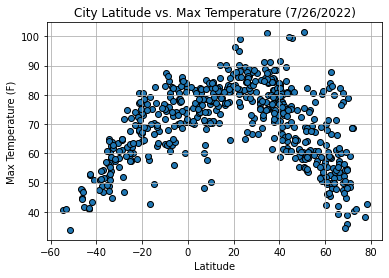

In [51]:
Xvalues = cleaned_citites_weather_DF['Lat']
Yvalues = cleaned_citites_weather_DF['Max Temp']
plt.scatter(Xvalues,Yvalues,marker="o" , edgecolors="black")
plt.title("City Latitude vs. Max Temperature (7/26/2022)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.grid(True)
plt.savefig("output_data/Fig1_City Latitude vs. Max Temperature.png")
plt.show()

-  at the equator, tempreatures ranges between 70 to 80 deg F
- highest temperatures are experiencced in citites falling on 20 lat

## Latitude vs. Humidity Plot

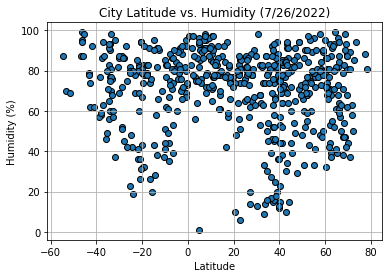

In [52]:
Xvalues = cleaned_citites_weather_DF['Lat']
Yvalues = cleaned_citites_weather_DF['Humidity']
plt.scatter(Xvalues,Yvalues,marker="o" , edgecolors="black")
plt.title("City Latitude vs. Humidity (7/26/2022)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid(True)
plt.savefig("output_data/Fig2_City Latitude vs. Humidity.png")
plt.show()

- At this time of the year humidity is realativly high
- Humidity % is irrelevant of the latitude


## Latitude vs. Cloudiness Plot

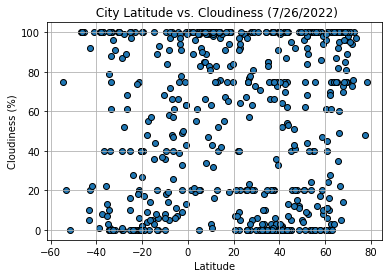

In [53]:
Xvalues = cleaned_citites_weather_DF['Lat']
Yvalues = cleaned_citites_weather_DF['Cloudiness']
plt.scatter(Xvalues,Yvalues,marker="o" , edgecolors="black")
plt.title(" City Latitude vs. Cloudiness (7/26/2022)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid(True)
plt.savefig("output_data/Fig3_City Latitude vs. Cloudiness.png")
plt.show()

- Cloudiness % distribution in cities is irrelative of lattitude

## Latitude vs. Wind Speed Plot

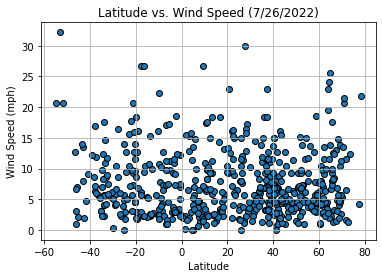

In [54]:
Xvalues = cleaned_citites_weather_DF['Lat']
Yvalues = cleaned_citites_weather_DF['Wind Speed']
plt.scatter(Xvalues,Yvalues,marker="o" , edgecolors="black")
plt.title("Latitude vs. Wind Speed (7/26/2022)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.grid(True)
plt.savefig("output_data/Fig4_Latitude vs. Wind Speed Plot.png")
plt.show()

- cities -40 and 60 lat experience wind speed range btween 0 and 10 mph
- highest wind speeds happens in cities near the equator

## Linear Regression

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.3457913597379231


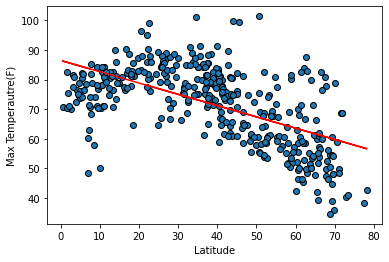

In [55]:
# filter the northern hemisphere by lat value > 0
Northern_Hemisphere_cities = cleaned_citites_weather_DF[cleaned_citites_weather_DF['Lat']>=0]

# Add the linear regression equation and line to plot

Xvalues = Northern_Hemisphere_cities['Lat']
Yvalues = Northern_Hemisphere_cities['Max Temp']

(slope, intercept, rvalue, pvalue, stderr) = linregress(Xvalues, Yvalues)
regress_values = Xvalues * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(Xvalues,Yvalues,marker="o" , edgecolors="black")

plt.plot(Xvalues,regress_values,"r-")
plt.annotate(line_eq,(6,30),fontsize=15,color="red")



plt.xlabel("Latitude")
plt.ylabel("Max Temperautre(F)")

print(f"The r-squared is: {rvalue**2}")

plt.savefig("output_data/Fig5_Northern Hemisphere - Max Temp vs. Latitude Linear Regression.png")
plt.show()


- r value shows a weak correlation between the latitude and max temperature for the selected cities
- As the slope moves toward the equator, temperature increases

- 

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.6312095877207957


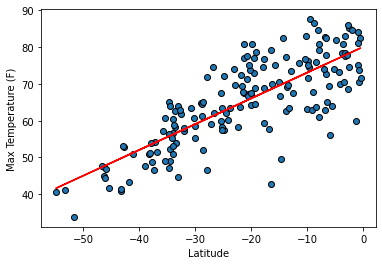

In [56]:
# filter the northern hemisphere by lat value < 0
Southern_Hemisphere_cities = cleaned_citites_weather_DF[cleaned_citites_weather_DF['Lat']<0]

# Add the linear regression equation and line to plot

Xvalues = Southern_Hemisphere_cities['Lat']
Yvalues = Southern_Hemisphere_cities['Max Temp']

(slope, intercept, rvalue, pvalue, stderr) = linregress(Xvalues, Yvalues)
regress_values = Xvalues * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(Xvalues,Yvalues,marker="o" , edgecolors="black")

plt.plot(Xvalues,regress_values,"r-")
plt.annotate(line_eq,(4,1),fontsize=10,color="red")



plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")

print(f"The r-squared is: {rvalue**2}")
plt.savefig("output_data/Fig6_Southern Hemisphere - Max Temp vs. Latitude Linear Regression.png")
plt.show()

- r value shows moderate correlation btween max tmperuatre and latitude in southeran hemiesphere
- as lat moves south temerature decreases

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.016858294904941847


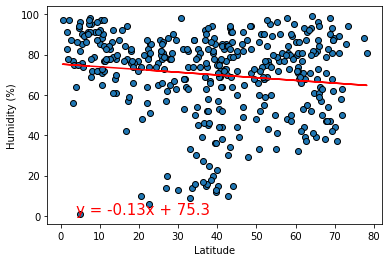

In [57]:
# filter the northern hemisphere by lat value > 0
Northern_Hemisphere_cities = cleaned_citites_weather_DF[cleaned_citites_weather_DF['Lat']>=0]

# Add the linear regression equation and line to plot

Xvalues = Northern_Hemisphere_cities['Lat']
Yvalues = Northern_Hemisphere_cities['Humidity']

(slope, intercept, rvalue, pvalue, stderr) = linregress(Xvalues, Yvalues)
regress_values = Xvalues * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(Xvalues,Yvalues,marker="o" , edgecolors="black")

plt.plot(Xvalues,regress_values,"r-")
plt.annotate(line_eq,(4,1),fontsize=15,color="red")



plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")

print(f"The r-squared is: {rvalue**2}")

plt.savefig("output_data/Fig7_Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression.png")
plt.show()

- r value shows very none or ver weak correalation btween latitude and humuidity which is apperant in the plot

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.004378256527008141


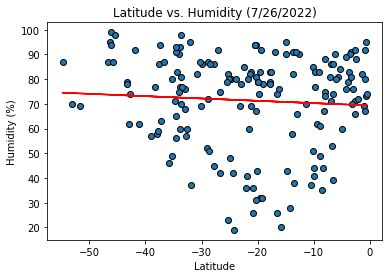

In [58]:
# filter the northern hemisphere by lat value < 0
Southern_Hemisphere_cities = cleaned_citites_weather_DF[cleaned_citites_weather_DF['Lat']<0]

# Add the linear regression equation and line to plot

Xvalues = Southern_Hemisphere_cities['Lat']
Yvalues = Southern_Hemisphere_cities['Humidity']

(slope, intercept, rvalue, pvalue, stderr) = linregress(Xvalues, Yvalues)
regress_values = Xvalues * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(Xvalues,Yvalues,marker="o" , edgecolors="black")

plt.plot(Xvalues,regress_values,"r-")
plt.annotate(line_eq,(4,1),fontsize=10,color="red")


plt.title("Latitude vs. Humidity (7/26/2022)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")

print(f"The r-squared is: {rvalue**2}")
plt.savefig("output_data/Fig8_Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression.png")
plt.show()

- r value shows very none or ver weak correalation btween latitude and humuidity which is apperant in the plot

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.002046279322352051


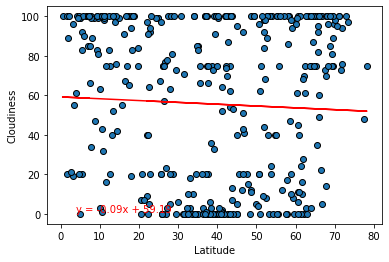

In [59]:
# filter the northern hemisphere by lat value > 0
Northern_Hemisphere_cities = cleaned_citites_weather_DF[cleaned_citites_weather_DF['Lat']>=0]

# Add the linear regression equation and line to plot

Xvalues = Northern_Hemisphere_cities['Lat']
Yvalues = Northern_Hemisphere_cities['Cloudiness']

(slope, intercept, rvalue, pvalue, stderr) = linregress(Xvalues, Yvalues)
regress_values = Xvalues * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(Xvalues,Yvalues,marker="o" , edgecolors="black")

plt.plot(Xvalues,regress_values,"r-")
plt.annotate(line_eq,(4,1),fontsize=10,color="red")



plt.xlabel("Latitude")
plt.ylabel("Cloudiness")

print(f"The r-squared is: {rvalue**2}")
plt.savefig("output_data/Fig9_Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression.png")
plt.show()

r values shows non existing correlation btween latitude and cloudiness which appearant in the scatter plot

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.000141469674939743


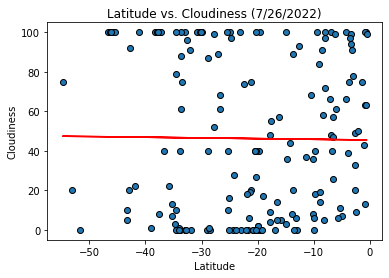

In [60]:
# filter the northern hemisphere by lat value < 0
Southern_Hemisphere_cities = cleaned_citites_weather_DF[cleaned_citites_weather_DF['Lat']<0]

# Add the linear regression equation and line to plot

Xvalues = Southern_Hemisphere_cities['Lat']
Yvalues = Southern_Hemisphere_cities['Cloudiness']

(slope, intercept, rvalue, pvalue, stderr) = linregress(Xvalues, Yvalues)
regress_values = Xvalues * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(Xvalues,Yvalues,marker="o" , edgecolors="black")

plt.plot(Xvalues,regress_values,"r-")
plt.annotate(line_eq,(4,1),fontsize=10,color="red")


plt.title("Latitude vs. Cloudiness (7/26/2022)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")

print(f"The r-squared is: {rvalue**2}")
plt.savefig("output_data/Fig10_Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression.png")
plt.show()

- r value shows non existing correlation btween latitude and cloudiness which appearant in the scatter plot

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.001666802911044056


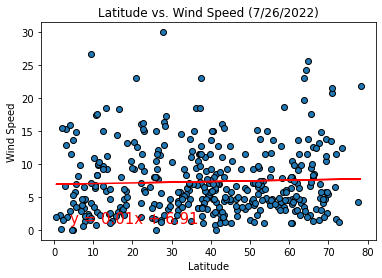

In [61]:
# filter the northern hemisphere by lat value > 0
Northern_Hemisphere_cities = cleaned_citites_weather_DF[cleaned_citites_weather_DF['Lat']>=0]

# Add the linear regression equation and line to plot

Xvalues = Northern_Hemisphere_cities['Lat']
Yvalues = Northern_Hemisphere_cities['Wind Speed']

(slope, intercept, rvalue, pvalue, stderr) = linregress(Xvalues, Yvalues)
regress_values = Xvalues * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(Xvalues,Yvalues,marker="o" , edgecolors="black")

plt.plot(Xvalues,regress_values,"r-")
plt.annotate(line_eq,(4,1),fontsize=15,color="red")


plt.title("Latitude vs. Wind Speed (7/26/2022)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")

print(f"The r-squared is: {rvalue**2}")
plt.savefig("output_data/Fig11_Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression.png")
plt.show()

- r value show non or very weak correlation btween latitude and wind speed as apperant in the plot

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.02001922395182762


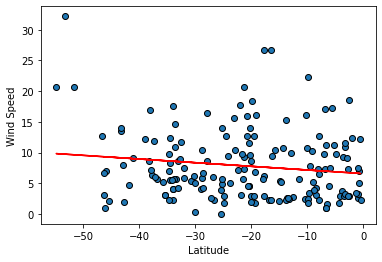

In [62]:
# filter the northern hemisphere by lat value < 0
Southern_Hemisphere_cities = cleaned_citites_weather_DF[cleaned_citites_weather_DF['Lat']<0]

# Add the linear regression equation and line to plot

Xvalues = Southern_Hemisphere_cities['Lat']
Yvalues = Southern_Hemisphere_cities['Wind Speed']

(slope, intercept, rvalue, pvalue, stderr) = linregress(Xvalues, Yvalues)
regress_values = Xvalues * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(Xvalues,Yvalues,marker="o" , edgecolors="black")

plt.plot(Xvalues,regress_values,"r-")
plt.annotate(line_eq,(4,1),fontsize=10,color="red")



plt.xlabel("Latitude")
plt.ylabel("Wind Speed")

print(f"The r-squared is: {rvalue**2}")
plt.savefig("output_data/Fig12_Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression.png")
plt.show()

- r value show non  correlation btween latitude and wind speed as apperant in the plot